Chargement des données MNIST...
Dimension de X: (70000, 784)
Dimension de y: (70000,)
X_train shape: (56000, 784)
y_train shape: (56000,)
X_test shape: (14000, 784)
y_test shape: (14000,)
Normalisation des données...


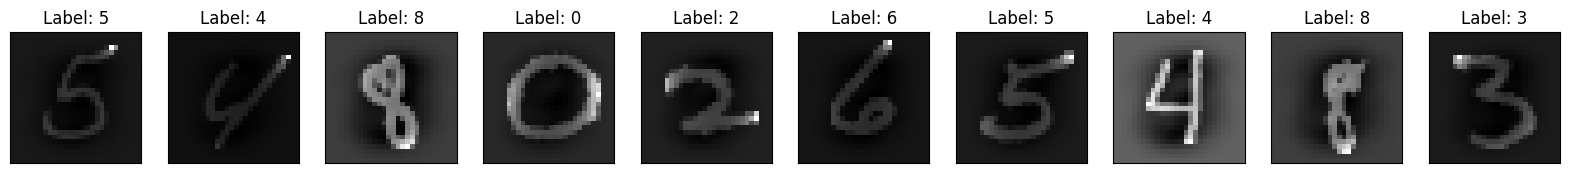

Création et entraînement du modèle...
Iteration 1, loss = 0.50280599
Iteration 2, loss = 0.17801493
Iteration 3, loss = 0.12758187
Iteration 4, loss = 0.09991039
Iteration 5, loss = 0.08245327
Iteration 6, loss = 0.06841507
Iteration 7, loss = 0.05780373
Iteration 8, loss = 0.04882893
Iteration 9, loss = 0.04208100
Iteration 10, loss = 0.03577780
Iteration 11, loss = 0.03076900
Iteration 12, loss = 0.02598790
Iteration 13, loss = 0.02253150
Iteration 14, loss = 0.02165054
Iteration 15, loss = 0.01975162
Temps d'entraînement: 43.50 secondes
Évaluation du modèle...
Précision sur l'ensemble de test: 0.9620


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


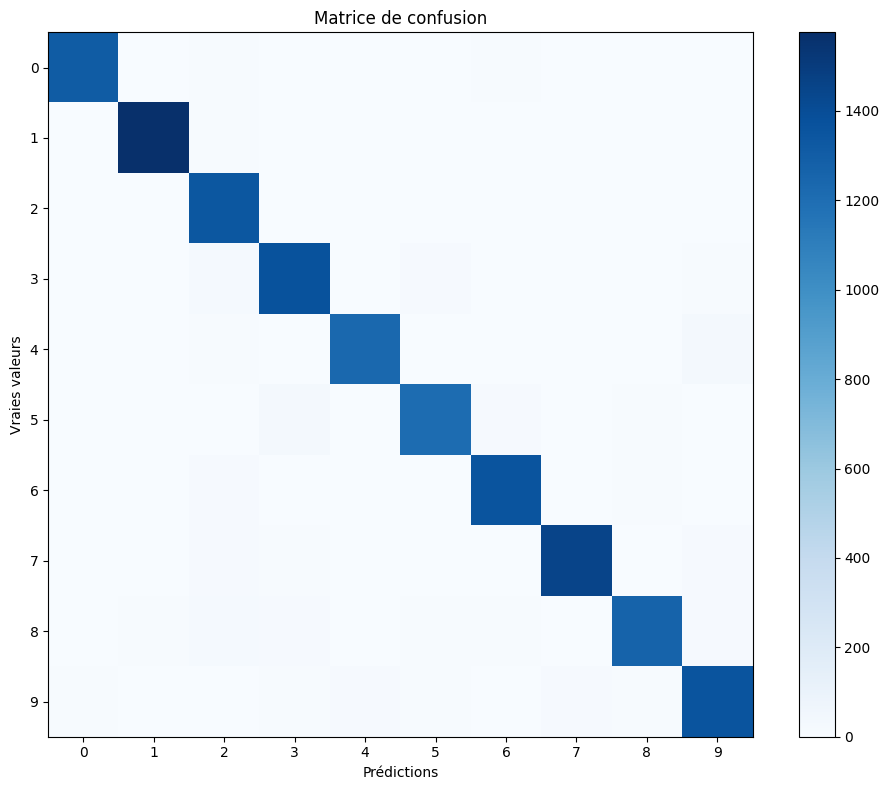

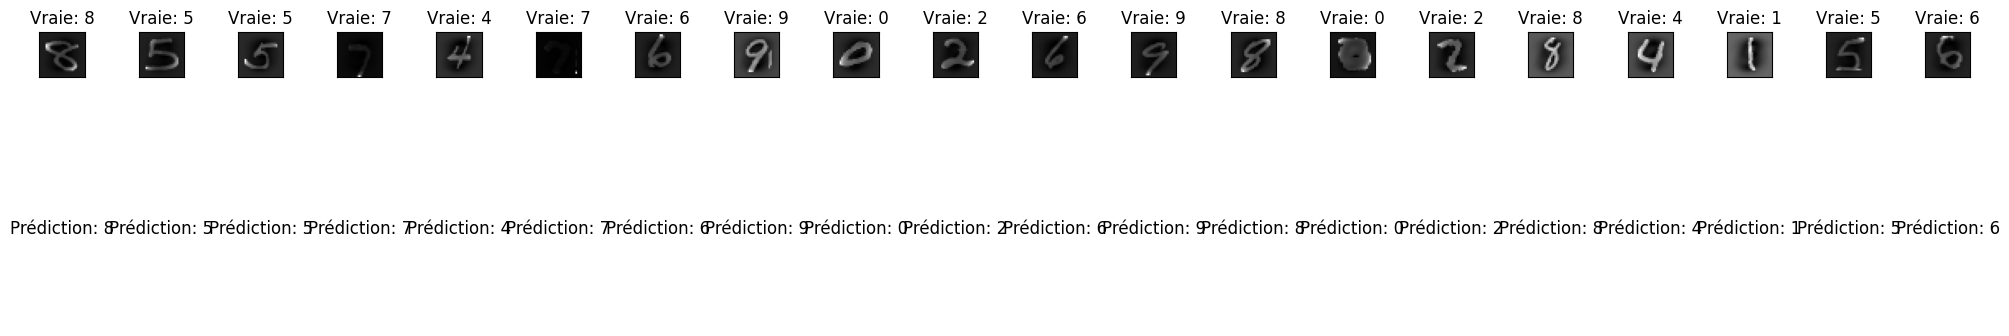

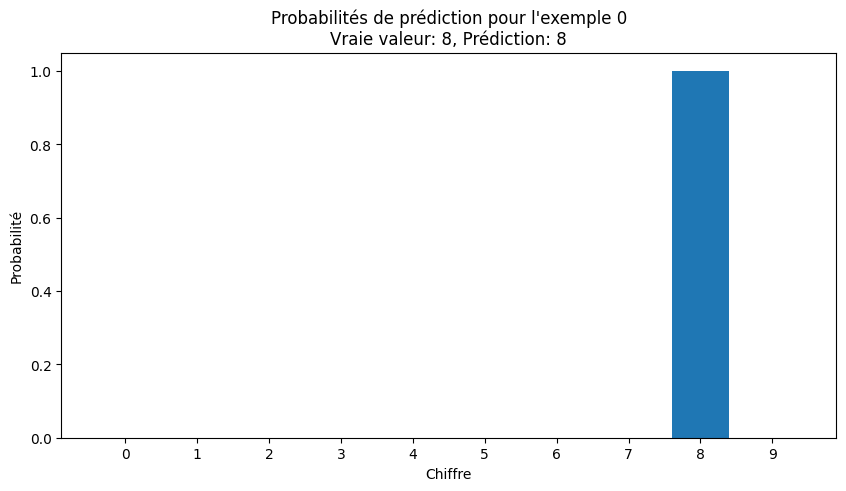

Sauvegarde du modèle...
Modèle sauvegardé sous 'mnist_sklearn_model.h5'

Pour charger le modèle plus tard:
import joblib
loaded_model = joblib.load('mnist_sklearn_model.h5')
Terminé!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Pour être sûr que les types de données sont corrects
import pandas as pd

# Chargement du dataset MNIST
print("Chargement des données MNIST...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.astype('float32')

# Afficher les dimensions des données
print(f"Dimension de X: {X.shape}")
print(f"Dimension de y: {y.shape}")

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conversion des labels en numpy array pour éviter les problèmes d'indexation
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Normalisation des données
print("Normalisation des données...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Afficher quelques exemples d'images
n = 10  # Nombre d'images à afficher
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

# Définition du modèle MLP
print("Création et entraînement du modèle...")
mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),  # Deux couches cachées de 50 et 25 neurones
    max_iter=15,                  # Nombre d'époques
    alpha=1e-4,                   # Paramètre de régularisation
    solver='adam',                # Optimiseur Adam
    verbose=10,                   # Affichage de la progression
    random_state=42,              # Pour reproductibilité
    batch_size=200                # Taille du batch
)

# Entraînement du modèle
tic = time()
mlp.fit(X_train, y_train)
toc = time()
print(f"Temps d'entraînement: {toc - tic:.2f} secondes")

# Évaluation du modèle
print("Évaluation du modèle...")
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur l'ensemble de test: {accuracy:.4f}")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)])
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.tight_layout()
plt.show()

# Visualiser quelques prédictions
n_samples = 20
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)
X_samples = X_test[sample_indices]
y_true = np.array(y_test)[sample_indices]  # Assurer que y_true est un array numpy
y_pred_samples = mlp.predict(X_samples)

plt.figure(figsize=(20, 4))
for i in range(n_samples):
    # Afficher l'image
    ax = plt.subplot(2, n_samples, i + 1)
    plt.imshow(X_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"Vraie: {y_true[i]}")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Afficher la prédiction
    ax = plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.text(0.5, 0.5, f"Prédiction: {y_pred_samples[i]}", 
             fontsize=12, ha='center', va='center')
    plt.axis('off')
    
    # Colorer le fond en vert pour les bonnes prédictions, rouge pour les erreurs
    if y_true[i] == y_pred_samples[i]:
        ax.set_facecolor('lightgreen')
    else:
        ax.set_facecolor('lightcoral')

plt.tight_layout()
plt.show()

# Afficher les probabilités de prédiction pour un exemple
if hasattr(mlp, "predict_proba"):
    sample_idx = 0  # Premier exemple de l'échantillon
    proba = mlp.predict_proba([X_samples[sample_idx]])[0]
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(10), proba)
    plt.xticks(range(10))
    plt.xlabel('Chiffre')
    plt.ylabel('Probabilité')
    plt.title(f'Probabilités de prédiction pour l\'exemple {sample_idx}\nVraie valeur: {y_true[sample_idx]}, Prédiction: {y_pred_samples[sample_idx]}')
    plt.show()

# Sauvegarde du modèle avec extension .h5
import joblib
print("Sauvegarde du modèle...")

# Sauvegarde avec joblib mais avec extension .h5
joblib.dump(mlp, 'mnist_sklearn_model.h5')
print("Modèle sauvegardé sous 'mnist_sklearn_model.h5'")

print("\nPour charger le modèle plus tard:")
print("import joblib")
print("loaded_model = joblib.load('mnist_sklearn_model.h5')")

print("Terminé!")